In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("masterClean.csv")
df.head(20)

,Unnamed: 0,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation,continent
0,0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X,EU
1,1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent,EU
2,2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X,EU
3,3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation,EU
4,4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers,EU
5,5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,"2,156,624,900",796,G.I. Generation,EU
6,6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,"2,156,624,900",796,Silent,EU
7,7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,"2,156,624,900",796,Boomers,EU
8,8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,"2,156,624,900",796,G.I. Generation,EU
9,9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,"2,156,624,900",796,Generation X,EU


In [3]:
#df.drop(columns=["Unnamed: 0"], inplace=True)
df["continent"] = df["continent"].fillna("NA")

In [4]:
df["age"].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

# 1. Analisis global
## Tendencia global

In [5]:
#Suicidios globales por cada 100k habitantes, 1985-2015.  X=year Y=Suicidios/100k
df_Tendencia = df[["year","suicides_no","population"]]

In [6]:
df_Tendencia

,year,suicides_no,population
0,1987,21,312900
1,1987,16,308000
2,1987,14,289700
3,1987,1,21800
4,1987,9,274300
...,...,...,...
27649,2014,107,3620833
27650,2014,9,348465
27651,2014,60,2762158
27652,2014,44,2631600


In [7]:
df_groupT = df_Tendencia.groupby("year")

In [8]:
for name,groups in df_groupT:
    print(name)
    print(groups)

1985
       year  suicides_no  population
264    1985            0        7709
265    1985            0        6344
266    1985            0        6173
267    1985            0        7339
268    1985            0        3778
...     ...          ...         ...
27061  1985           16      347300
27062  1985            5      240000
27063  1985            3      203000
27064  1985            2      263100
27065  1985            1      271000

[564 rows x 3 columns]
1986
       year  suicides_no  population
276    1986            0        7668
277    1986            0        6209
278    1986            0        6101
279    1986            0        6907
280    1986            0        3764
...     ...          ...         ...
27073  1986           12      241800
27074  1986            8      204500
27075  1986            8      349600
27076  1986            2      273000
27077  1986            0      265000

[576 rows x 3 columns]
1987
       year  suicides_no  population
0      1987 

In [9]:
population = df_groupT["population"].sum()

In [10]:
population = population[0:-1]

In [11]:
population

year
1985    1008533686
1986    1029909613
1987    1095029726
1988    1054094424
1989    1225514347
1990    1466581000
1991    1489949284
1992    1569500347
1993    1530416654
1994    1548749372
1995    1591559103
1996    1662267662
1997    1702991519
1998    1725181351
1999    1776337963
2000    1799202539
2001    1755565489
2002    1822152815
2003    1838458020
2004    1745246613
2005    1734881381
2006    1840908837
2007    1859564353
2008    1860620851
2009    1973620817
2010    1994548889
2011    1989236841
2012    1912812088
2013    1890161710
2014    1904772042
2015    1774657932
Name: population, dtype: int64

In [12]:
suicides = df_groupT["suicides_no"].sum()
suicides = suicides[:-1]
suicides

year
1985    116063
1986    120670
1987    126842
1988    121026
1989    160244
1990    193361
1991    198020
1992    211473
1993    221565
1994    232063
1995    243544
1996    246725
1997    240745
1998    249591
1999    256117
2000    255831
2001    250652
2002    256095
2003    256079
2004    240861
2005    234374
2006    233361
2007    233408
2008    235447
2009    243474
2010    238689
2011    236437
2012    230160
2013    223199
2014    222664
2015    203640
Name: suicides_no, dtype: int64

In [13]:
suicides_per_100k = ((suicides/population)*100000).tolist()

In [14]:
suicides_per_100k

[11.508093543243334,
 11.716562160100937,
 11.583429836497425,
 11.481514107696295,
 13.075652716124424,
 13.184474638632302,
 13.290385258509243,
 13.473905909241573,
 14.477430013643854,
 14.983896309854323,
 15.302227830617989,
 14.842675800066186,
 14.136594182299039,
 14.46752249294399,
 14.418258537212832,
 14.219132891074695,
 14.277564783001951,
 14.054529230030578,
 13.929009921042416,
 13.80097220678577,
 13.509511518586065,
 12.676401748404448,
 12.551757061993971,
 12.654216998237864,
 12.33641223799475,
 11.96706690502185,
 11.88581445541406,
 12.032546293695317,
 11.808460557589012,
 11.689797786311692,
 11.474887431996668]

In [15]:
years = df["year"].unique().tolist()
years = years[:-1]
years.sort()
years

[1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

In [16]:
#Algunos parametros para graficar antes.
font1 = {'family':'sans serif','color':'black','size':20}
titulo = "Suicidios Globales(p/100k)"
subtitulo = "Tendencia a lo largo del tiempo, 1985-2015"

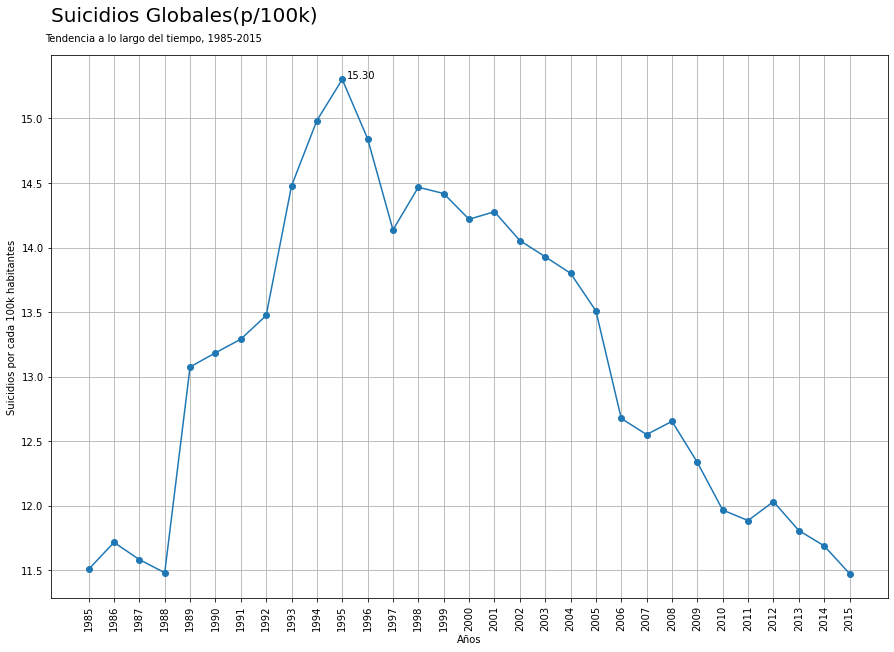

In [17]:
#Ahora si a graficar.
plt.figure(figsize=(15,10))
plt.suptitle(subtitulo,fontsize=10,x=0.22,y=0.91)
plt.title(titulo,fontdict=font1,loc="left",x=0,y=1.05)
plt.xlabel("Años")
plt.ylabel("Suicidios por cada 100k habitantes")
plt.xticks(years,rotation=90)
plt.grid(True)
plt.annotate("15.30",(1995.2,15.31))
plt.plot(years,suicides_per_100k,'-o')

### Insights 
* Del año 1988-1989 hubo un crecimiento drastico (que pudo desencadenarlo?).
* El maximo pico de suicidios se alcanzo en 1995 con un promedio de 15.3 muertes por cada 100k habitantes.
* La tasa de suicidios se redujo de forma constante hasta el 2015(ultimo año analizado)
* La tasa apenas se redujo hasta lo previo a los 90 (que ocurrio?)

## Por continente

In [18]:
df_Tendencia_Cont = df[["year","suicides_no","population","continent"]]

In [19]:
df_Tendencia_Cont

,year,suicides_no,population,continent
0,1987,21,312900,EU
1,1987,16,308000,EU
2,1987,14,289700,EU
3,1987,1,21800,EU
4,1987,9,274300,EU
...,...,...,...,...
27649,2014,107,3620833,AS
27650,2014,9,348465,AS
27651,2014,60,2762158,AS
27652,2014,44,2631600,AS


In [20]:
df_groupT_C = df_Tendencia_Cont.groupby("continent")

In [21]:
for names,groups in df_groupT_C:
    print(names)
    print(groups)

AF
       year  suicides_no  population continent
16134  1985            2        8800        AF
16135  1985           19       88500        AF
16136  1985           18       89500        AF
16137  1985            9       45300        AF
16138  1985           21      109400        AF
...     ...          ...         ...       ...
23357  2015           26     6396045        AF
23358  2015            2      615701        AF
23359  2015           10     3155486        AF
23360  2015           11     5318168        AF
23361  2015            6     5243427        AF

[838 rows x 4 columns]
AS
       year  suicides_no  population continent
960    1990           25      332700        AS
961    1990            2       26900        AS
962    1990           11      183800        AS
963    1990           16      307100        AS
964    1990           15      358000        AS
...     ...          ...         ...       ...
27649  2014          107     3620833        AS
27650  2014            9      

In [38]:
continentes = df["continent"].unique().tolist()
continentes.sort() #NA = North America, SA = South America

In [23]:
suicides_C = df_groupT_C["suicides_no"].sum()
suicides_C

continent
AF      11313
AS    1455692
EU    3408125
NA    1340639
OC      84851
SA     446980
Name: suicides_no, dtype: int64

In [29]:
population_C = df_groupT_C["population"].sum()

In [30]:
population_C

continent
AF      907935487
AS    10142834343
EU    18842703778
NA    12746171957
OC      654397213
SA     8008918797
Name: population, dtype: int64

In [37]:
suicides_per_100k_C = (suicides_C/population_C)*100000
suicides_per_100k_C

continent
AF     1.246014
AS    14.351925
EU    18.087240
NA    10.517974
OC    12.966284
SA     5.581028
dtype: float64

In [36]:
suicides_per_100k_C = list(suicides_per_100k_C)
suicides_per_100k_C

[1.2460136388522944,
 14.351925219055111,
 18.08723970908672,
 10.517973588640798,
 12.966283827984459,
 5.5810279930348505]

### Grafica suicidios por continente(per 100k)

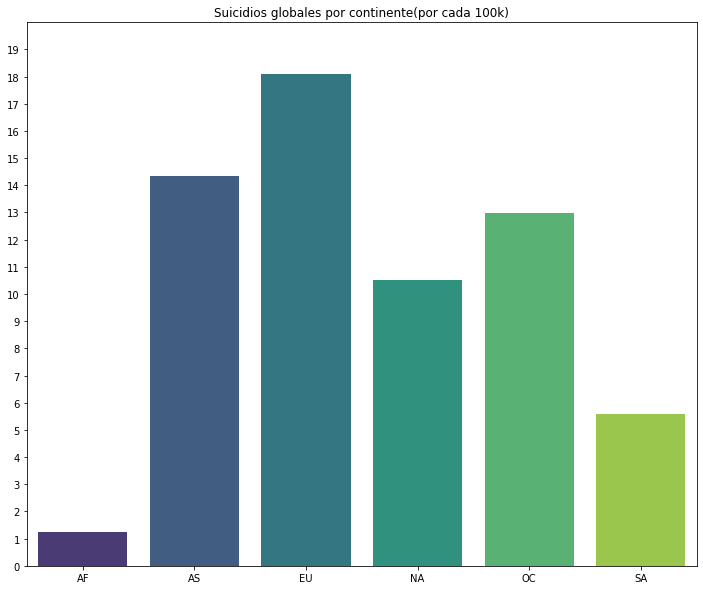

In [60]:
plt.figure(figsize=(12,10))
plt.title("Suicidios globales por continente(por cada 100k)")
plt.ylim([0,20])
plt.yticks(np.arange(0,20,step=1))
sns.barplot(x = continentes,y = suicides_per_100k_C,palette = "viridis")
plt.show()

### Tendencia de suicidios a lo largo del tiempo, por continente

In [64]:
#X = Años, Y = ratio por año
df_groupT_C1 = df_Tendencia_Cont.groupby(["year","continent"])

In [65]:
for names,groups in df_groupT_C1:
    print(names)
    print(groups)

(1985, 'AF')
       year  suicides_no  population continent
16134  1985            2        8800        AF
16135  1985           19       88500        AF
16136  1985           18       89500        AF
16137  1985            9       45300        AF
16138  1985           21      109400        AF
16139  1985           18      106300        AF
16140  1985            4       47900        AF
16141  1985            6       87200        AF
16142  1985            6       90500        AF
16143  1985            1      104700        AF
16144  1985            0      100900        AF
16145  1985            0        4400        AF
22018  1985            3        4400        AF
22019  1985            3        7700        AF
22020  1985            1        2800        AF
22021  1985            1        7500        AF
22022  1985            0        4200        AF
22023  1985            0        4800        AF
22024  1985            0        7700        AF
22025  1985            0        3500        AF


[156 rows x 4 columns]
(1992, 'EU')
       year  suicides_no  population continent
36     1992           12      343800        EU
37     1992            9      263700        EU
38     1992            5      159500        EU
39     1992            7      245500        EU
40     1992            7      292400        EU
...     ...          ...         ...       ...
26401  1992          347     7352110        EU
26402  1992          191     4529424        EU
26403  1992           91     3882211        EU
26404  1992            2     3742157        EU
26405  1992            0     3544844        EU

[324 rows x 4 columns]
(1992, 'NA')
       year  suicides_no  population continent
348    1992            0        6369        NA
349    1992            0        6650        NA
350    1992            0        6534        NA
351    1992            0        7311        NA
352    1992            0        3648        NA
...     ...          ...         ...       ...
26773  1992          549     88981

[204 rows x 4 columns]
(1999, 'EU')
       year  suicides_no  population continent
120    1999            3       25900        EU
121    1999           24      250600        EU
122    1999            4       42400        EU
123    1999           31      391100        EU
124    1999           19      242300        EU
...     ...          ...         ...       ...
26485  1999          232     5703910        EU
26486  1999          171     4419817        EU
26487  1999           88     3503102        EU
26488  1999            4     3975507        EU
26489  1999            1     3778962        EU

[420 rows x 4 columns]
(1999, 'NA')
       year  suicides_no  population continent
408    1999            0        6589        NA
409    1999            0        8526        NA
410    1999            0       10311        NA
411    1999            0        8314        NA
412    1999            0        3968        NA
...     ...          ...         ...       ...
26857  1999         1061    222582

       year  suicides_no  population continent
216    2007            8       42366        EU
217    2007           29      378626        EU
218    2007           14      224160        EU
219    2007            3       57404        EU
220    2007            9      172494        EU
...     ...          ...         ...       ...
26581  2007          132     3923507        EU
26582  2007           82     2886921        EU
26583  2007           70     3963103        EU
26584  2007           10     3648686        EU
26585  2007            4     3479755        EU

[432 rows x 4 columns]
(2007, 'NA')
       year  suicides_no  population continent
504    2007            1       12530        NA
505    2007            0        8013        NA
506    2007            0        6962        NA
507    2007            0       13860        NA
508    2007            0        8555        NA
...     ...          ...         ...       ...
26953  2007          997    19839678        NA
26954  2007          41

1785  2015            6     1507502        OC
(2015, 'SA')
       year  suicides_no  population continent
948    2015          245      712691        SA
949    2015          656     3500580        SA
950    2015          431     3011963        SA
951    2015          465     3289927        SA
952    2015          633     5166179        SA
...     ...          ...         ...       ...
27385  2015           23      232133        SA
27386  2015           38      440475        SA
27387  2015           17      255067        SA
27388  2015            3      252509        SA
27389  2015            2      241598        SA

[72 rows x 4 columns]
(2016, 'AF')
       year  suicides_no  population continent
16506  2016           17       87701        AF
16507  2016            3       15754        AF
16508  2016           18       96372        AF
16509  2016           33      180530        AF
16510  2016           12      107902        AF
16511  2016            4       94001        AF
16512  2016 

In [84]:
population_CY = df_groupT_C1["population"].sum()
population_CY

year  continent
1985  AF              940700
      AS           217624243
      EU           255560980
      NA           322722749
      OC            17588300
                     ...    
2015  SA           309567680
2016  AF              992432
      AS            58766499
      EU            70096364
      NA               79012
Name: population, Length: 190, dtype: int64

In [85]:
suicides_CY = df_groupT_C1["suicides_no"].sum()
suicides_CY

year  continent
1985  AF             112
      AS           36182
      EU           34098
      NA           34749
      OC            2199
                   ...  
2015  SA           20109
2016  AF              98
      AS            4288
      EU           10794
      NA               0
Name: suicides_no, Length: 190, dtype: int64

In [91]:
suicides_per_100k_CY = (suicides_CY/population_CY)*100000
suicides_per_100k_CY.head(20)

year  continent
1985  AF           11.906027
      AS           16.625905
      EU           13.342412
      NA           10.767447
      OC           12.502630
      SA            4.494151
1986  AF            3.035060
      AS           17.109056
      EU           13.228170
      NA           11.126984
      OC           13.781194
      SA            4.527362
1987  AF           14.748350
      AS           14.558832
      EU           14.473337
      NA           11.010022
      OC           14.518946
      SA            4.581886
1988  AF           18.054054
      AS           16.259814
dtype: float64

In [76]:
suicides_per_100k_CY = list(suicides_per_100k_CY)

In [87]:
len(suicides_per_100k_CY) 

190

In [143]:
AF = suicides_per_100k_CY[0::6]
AF = list(AF[0:-1])

[11.906027426384608,
 3.0350601779173205,
 14.748349834983498,
 18.054054054054056,
 15.43573802122414,
 15.620019126554032,
 14.603986781792987,
 15.395971738901192,
 14.400500886987372,
 13.260690789473683,
 14.97097464100214,
 0.7635034615080246,
 0.5715751576946776,
 0.8321168695475231,
 1.1062281867918797,
 0.9705791513063707,
 1.1882850964787095,
 0.8659111653821193,
 0.8075997893357595,
 1.0998286892350306,
 1.2622609945110859,
 1.4132387658724654,
 1.2010045026968994,
 1.1779180927862782,
 1.0480249873063043,
 1.047970126146083,
 1.000815466939299,
 1.2411267896766234,
 1.4042150326682332,
 1.4038614725334304,
 1.1657564755953798]

In [150]:
AS = suicides_per_100k_CY[1::6]
AS = list(AS[0:-1])
len(AS)

31

In [151]:
EU = suicides_per_100k_CY[2::6]
EU = list(EU[0:-1])
len(EU)

31

In [152]:
NA = suicides_per_100k_CY[3::6]
NA = list(NA[0:-1])
len(NA)

31

In [158]:
OC = suicides_per_100k_CY[4::6]
OC = list(OC)

In [155]:
SA = suicides_per_100k_CY[5::6]
SA = list(SA)
len(SA)

31

<AxesSubplot:>

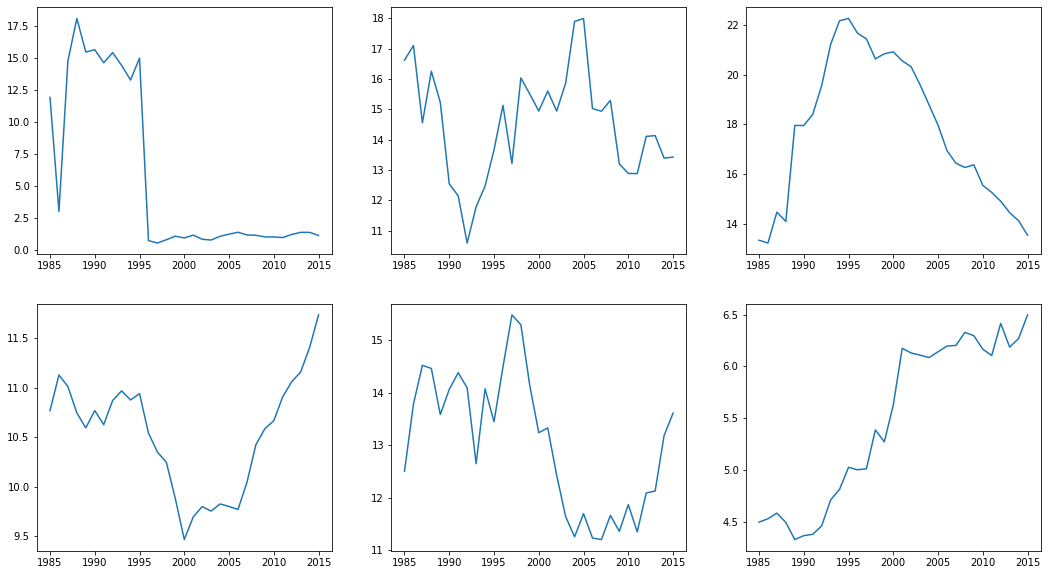

In [164]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.lineplot(ax=axes[0,0],x=years, y=AF)
sns.lineplot(ax=axes[0,1], x=years, y=AS)
sns.lineplot(ax=axes[0,2], x=years, y=EU)
sns.lineplot(ax=axes[1,0], x=years, y=NA)
sns.lineplot(ax=axes[1,1], x=years, y=OC)
sns.lineplot(ax=axes[1,2], x=years, y=SA)
